In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

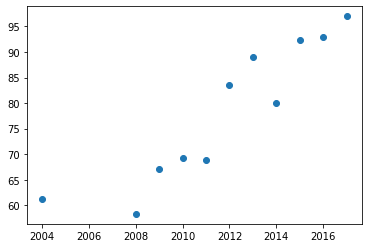

In [15]:
y = [61.2,58.3,67.1,69.2,68.9,83.5,89.1,80,92.3,93,97]
x = [2004,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
plt.scatter(x,y)
plt.show()

best fit line:
y = -6520.32 + 3.28x


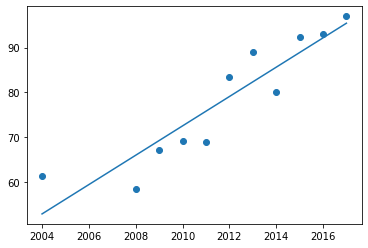

In [17]:
# Now we have to plot the line of the best fit 
# For that we need to find the 
def best_fit(X, Y):

    xbar = sum(X)/len(X) # mean of the x
    ybar = sum(Y)/len(Y) # mean of the y
    n = len(X) # or len(Y) 

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    slope = numer / denum
    intercept  = ybar - slope * xbar 

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(intercept, slope))

    return intercept, slope

# solution
intercept, slope = best_fit(x, y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(x, y)
yfit = [intercept + slope * xi for xi in x]
plt.plot(x, yfit)

In [41]:
def predict(intercept,slope,value):
    y = round(slope*value+intercept,3)
    print(f"the value in Year {value} is: {y} billion")

predict(intercept,slope,2019)

the value in Year 2019 is: 102.0 billion


## Linear Regression Model using gradient Descent

In [39]:
data = pd.read_csv('data.csv')

In [40]:
data.head

<bound method NDFrame.head of     32.502345269453031  31.70700584656992
0            53.426804          68.777596
1            61.530358          62.562382
2            47.475640          71.546632
3            59.813208          87.230925
4            55.142188          78.211518
..                 ...                ...
94           50.030174          81.536991
95           49.239765          72.111832
96           50.039576          85.232007
97           48.149859          66.224958
98           25.128485          53.454394

[99 rows x 2 columns]>

In [49]:
x = data.iloc[:,0]
y = data.iloc[:,-1]

In [47]:
# Initialize the m and c
m = 0
c = 0

In [52]:
def gradient_descent(epochs,learning_rate):
    for i in range(epochs):
        y_pred = m*x + c  # m gets broadcasted...
        m = m - learning_rate*(np.sum((y-y_pred)*x))
        c = c - learning_rate*(np.sum((y-y_pred)))
    print(m,c)
